In [ ]:
#default_exp audio.model
#default_cls_lvl 3

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#export
from local.core import *
from local.torch_basics import *
from local.test import *
from local.data.all import *
from local.callback.fp16 import *
from local.audio.core import *
from local.notebook.showdoc import *

In [ ]:
url = URLs.ESC50_SAMPLE

In [ ]:
path = untar_data(url)

In [ ]:
items = get_audio_files(path)

In [ ]:
split_idx = RandomSplitter()(items)

In [ ]:
split_idx

((#64) [45,60,7,73,42,3,64,61,40,34...],
 (#16) [9,36,70,2,13,38,72,33,51,24...])

In [ ]:
items[0]

PosixPath('/home/kbird/.fastai/data/esc50_sample/cat/1-79113-A-5.wav')

In [ ]:
items[0]

PosixPath('/home/kbird/.fastai/data/esc50_sample/cat/1-79113-A-5.wav')

In [ ]:
mel_args = {'sample_rate': 44100, 'n_fft': 2560}

In [ ]:
pipe_audio = Pipeline([AudioSignal.create, MelSpectrogramify(**mel_args), AmplitudeToDBify()], as_item=True)

In [ ]:
pipe_audio(items[0])

tensor([[[  15.6331,   21.7171,   18.7544,  ..., -100.0000, -100.0000,
          -100.0000],
         [  11.1212,   12.3099,   15.5395,  ..., -100.0000, -100.0000,
          -100.0000],
         [   2.9383,   10.0557,    9.6219,  ..., -100.0000, -100.0000,
          -100.0000],
         ...,
         [ -58.4088,  -55.9744,  -56.2537,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -58.7888,  -56.6905,  -54.8807,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -56.1805,  -57.3048,  -55.9376,  ..., -100.0000, -100.0000,
          -100.0000]]])

In [ ]:
class PetAudioTfm(Transform):
    def __init__(self, items, train_idx):
        self.items,self.train_idx = items,train_idx
        self.labeller = parent_label
        vals = map(self.labeller, items[train_idx])
        self.vocab,self.o2i = uniqueify(vals, sort=True, bidir=True)

    def encodes(self, i):
        o = self.items[i]
        return pipe_audio(o), self.o2i[self.labeller(o)]
    
    def decodes(self, x): return TitledImage(x[0],self.vocab[x[1]])

In [ ]:
vals = list(map(labeller, items[split_idx[0]]))

NameError: name 'labeller' is not defined

In [ ]:
vocab,o2i = uniqueify(vals, sort=True, bidir=True)

In [ ]:
pets = PetAudioTfm(items,split_idx[0])

In [ ]:
parent_label??

In [ ]:
get_audio_files??

In [ ]:
pets = DataBlock(types=(AudioSpectrogram, Category), 
          get_items=get_audio_files, 
          splitter=RandomSplitter(), 
          get_y=parent_label
         )

In [ ]:
pets.databunch??

In [ ]:
pets.datasource??

In [ ]:
pets.source.ls()

(#3) [/home/kbird/.fastai/data/esc50_sample/meta.csv,/home/kbird/.fastai/data/esc50_sample/cat,/home/kbird/.fastai/data/esc50_sample/dog]

In [ ]:
items = pets.get_items(pets.source)

In [ ]:
isinstance(items,tuple)

False

In [ ]:
pets.default_type_tfms

(#2) [(#0) [],(#1) [<class 'local.data.transforms.Categorize'>]]

In [ ]:
(pets.splitter)(items)

<function local.data.transforms.RandomSplitter.<locals>._inner(o, **kwargs)>

In [ ]:
split

TypeError: 'function' object is not subscriptable

In [ ]:
db = pets.databunch(path, item_tfms=pipe_audio, bs=64)

In [ ]:
xb,yb = next(iter(db[0]))

In [ ]:
yb

tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], device='cuda:0')

In [ ]:
ti = TensorImage(xb[0])

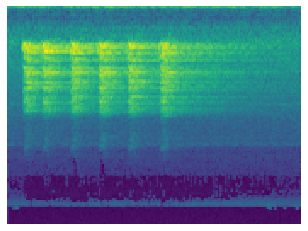

In [ ]:
ti.show()

In [ ]:
yb[0]

tensor(1, device='cuda:0')

In [ ]:
ti.show

In [ ]:
xb

tensor([[[[   8.9957,    3.2246,    6.1265,  ...,    3.5845,   -3.8180,
              3.1014],
          [  -4.7089,   -6.5559,   -4.4905,  ...,  -10.8361,   -9.8912,
            -11.3869],
          [ -11.9192,  -19.6763,  -20.9396,  ...,  -19.0593,  -14.5815,
            -11.4131],
          ...,
          [ -49.5899,  -54.8365,  -56.1098,  ...,  -56.2598,  -56.1479,
            -54.4922],
          [ -49.0153,  -55.5258,  -55.5441,  ...,  -55.4675,  -56.9224,
            -54.9693],
          [ -48.6696,  -56.7149,  -56.5618,  ...,  -55.3132,  -55.6199,
            -55.5124]]],


        [[[ -34.6463,  -37.2920,  -37.9672,  ...,  -26.6374,  -36.6319,
            -31.1149],
          [ -50.5748,  -44.4432,  -48.8590,  ...,  -21.8685,  -26.1628,
            -30.4342],
          [ -56.5992,  -47.8358,  -38.7341,  ...,  -23.4593,  -22.5113,
            -31.9791],
          ...,
          [ -71.5404,  -62.7501,  -59.0261,  ...,  -55.7360,  -56.5577,
            -55.5601],
          [ -68.

In [ ]:
db.show_batch()

AttributeError: 'Tensor' object has no attribute 'show'

In [ ]:
from local.data.core import _pre_show_batch

ImportError: cannot import name '_pre_show_batch' from 'local.data.core' (/home/kbird/fastai_dev/dev/local/data/core.py)

In [ ]:
db._

In [ ]:
%debug

> /home/kbird/fastai_dev/dev/local/data/core.py(16)<listcomp>()
     14     if ctxs is None: ctxs = Inf.nones
     15     for i in range(1 if y is None else 2):
---> 16         ctxs = [b.show(ctx=c, **kwargs) for b,c,_ in zip(its.itemgot(i),ctxs,range(max_n))]
     17     return ctxs
     18 

ipdb> type(b)
<class 'torch.Tensor'>
ipdb> ll
     13 def default_show_batch(x, y, its, ctxs=None, max_n=10, **kwargs):
     14     if ctxs is None: ctxs = Inf.nones
     15     for i in range(1 if y is None else 2):
---> 16         ctxs = [b.show(ctx=c, **kwargs) for b,c,_ in zip(its.itemgot(i),ctxs,range(max_n))]
     17     return ctxs
     18 

ipdb> x
*** NameError: name 'x' is not defined
ipdb> u
> /home/kbird/fastai_dev/dev/local/data/core.py(16)default_show_batch()
     14     if ctxs is None: ctxs = Inf.nones
     15     for i in range(1 if y is None else 2):
---> 16         ctxs = [b.show(ctx=c, **kwargs) for b,c,_ in zip(its.itemgot(i),ctxs,range(max_n))]
     17     return ctxs
     1

ipdb> b
ipdb> its
(#10) [(tensor([[[-3.5333e+00,  3.5625e-02, -4.6490e+00,  ..., -4.5382e+00,
          -6.8533e+00, -4.5832e+00],
         [-2.2142e+01, -2.0831e+01, -2.1099e+01,  ..., -9.6294e+00,
          -8.4845e+00, -8.8654e+00],
         [-2.7694e+01, -2.2331e+01, -1.6169e+01,  ..., -1.0923e+01,
          -1.3214e+01, -8.7950e+00],
         ...,
         [-4.9931e+01, -5.4833e+01, -4.3166e+01,  ..., -5.6164e+01,
          -5.6806e+01, -4.5102e+01],
         [-5.1985e+01, -5.4943e+01, -4.2674e+01,  ..., -5.4841e+01,
          -5.6281e+01, -4.5147e+01],
         [-5.1378e+01, -5.3173e+01, -5.4127e+01,  ..., -5.5531e+01,
          -5.5775e+01, -4.5879e+01]]]), 'dog'),(tensor([[[ 15.6899,  12.1698,   9.9354,  ...,  12.4608,  19.3979,  17.6891],
         [ -7.3855,  -9.6145,  -8.7922,  ...,  17.9739,  17.7659,  19.6332],
         [-26.3461, -11.1405,  -8.4761,  ...,  21.7487,  18.3044,  22.1084],
         ...,
         [-32.1914, -54.9629, -55.7772,  ..., -56.1644, -55.6927, -32.2483

ipdb> ll
     13 def default_show_batch(x, y, its, ctxs=None, max_n=10, **kwargs):
     14     if ctxs is None: ctxs = Inf.nones
     15     for i in range(1 if y is None else 2):
---> 16         ctxs = [b.show(ctx=c, **kwargs) for b,c,_ in zip(its.itemgot(i),ctxs,range(max_n))]
     17     return ctxs
     18 

ipdb> u
> /home/kbird/fastai_dev/dev/local/data/core.py(28)show_batch()
     26 #Cell
     27 @typedispatch
---> 28 def show_batch(*args, **kwargs): return default_show_batch(*args, **kwargs)
     29 
     30 #Cell

ipdb> u
> /home/kbird/fastai_dev/dev/local/dispatch.py(97)__call__()
     95         if not f: return args[0]
     96         if self.inst is not None: f = types.MethodType(f, self.inst)
---> 97         return f(*args, **kwargs)
     98 
     99     def __get__(self, inst, owner):

ipdb> u
> /home/kbird/fastai_dev/dev/local/data/core.py(84)show_batch()
     82         "Show `b` (defaults to `one_batch`), a list of lists of pipeline outputs (i.e. output of a `DataLoa

In [ ]:
db.valid_dl

In [ ]:
db.test_dl

AttributeError: test_dl

In [ ]:
type(xb)

local.audio.core.AudioSpectrogram

TypeError: Invalid shape (64, 1, 128, 173) for image data

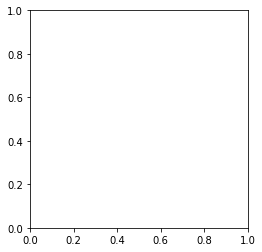

In [ ]:
xb.show()

In [ ]:
next(iter(db))

In [ ]:
db.train

IndexError: list index out of range

In [ ]:
tfms = [[PILImage.create], [label, PILMask.create]]

In [ ]:
DataSource(pets.items, split_idx)

In [ ]:
pets.o2i

In [ ]:
len(pets)

In [ ]:
len(pets.items)

In [ ]:
for i in pets.train_idx:
    print(pets(i)[1])

1
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
1
0
0
1
1
0
0
1


In [ ]:
pets.encodes(items[0])

(Pipeline: (#3) [Transform: True (Path,object) -> create ,MelSpectrogramify: True (AudioSignal,object) -> encodes ,AmplitudeToDBify: True (AudioSignal,object) -> encodes
 (AudioSpectrogram,object) -> encodes ], 0)

In [ ]:
pets(items[0])

(Pipeline: (#3) [Transform: True (Path,object) -> create ,MelSpectrogramify: True (AudioSignal,object) -> encodes ,AmplitudeToDBify: True (AudioSignal,object) -> encodes
 (AudioSpectrogram,object) -> encodes ], 0)